Can we make change on the images, like denoise them or make them more vague, by the Autoencoders?

We want to teach the machine that save important features of the data and remove the remained!

When the input is large and it get smaller and smaller for every layer we would reduce the dimentions and keep the most important features of the data

In this code we want just get an image, reduce it dimentions with the encoder and reproduce it again with the decoder!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import mnist

C:\Users\moham\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

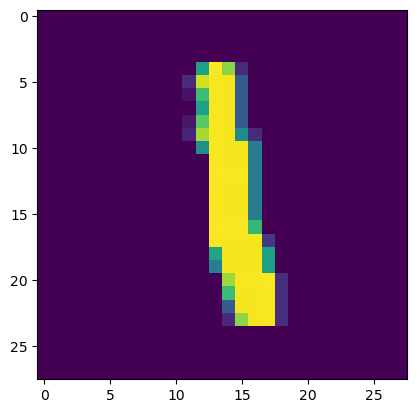

In [4]:
plt.imshow(X_train[6])

Let's rescale the data!

In [5]:
X_train=X_train/255

In [6]:
X_test=X_test/255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

Note:Here we are going to reduce the dimention of the image and then reproduce it again.

Each image is 28*28 


In [8]:
X_train[0].shape

(28, 28)

In [9]:
28*28

784

In [10]:
784/2

392.0

In [11]:
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400, activation='relu'))
#we would slowly decrease the dimention
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

C:\Users\moham\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Note:Using the ReLU (Rectified Linear Unit) activation function has become a standard practice in deep learning models, including the encoder part of autoencoders, for several reasons:

Avoiding the Vanishing Gradient Problem: Activation functions like the sigmoid or tanh can suffer from the vanishing gradient problem, where gradients become very small, causing slow learning or even stopping the learning in deep layers. ReLU does not have this problem because its gradient is either 0 or 1.

Sparsity: ReLU can output zero for any input less than zero, leading to sparse representations, which can be beneficial in reducing the computational complexity and improving the model's generalization.

Efficient Computation: ReLU is computationally efficient because it involves simple thresholding at zero. This efficiency speeds up the training process.

Empirical Performance: ReLU has shown excellent empirical performance in various deep learning tasks. Many practical experiments and research have demonstrated that networks using ReLU converge faster and often achieve better performance compared to those using other activation functions.

Other activation functions like sigmoid, tanh, or leaky ReLU can be used, and each has its own advantages and disadvantages:

Sigmoid: Good for binary classification, but suffers from vanishing gradients and outputs in the range [0, 1].
Tanh: Outputs in the range [-1, 1], which can help center the data but still suffers from the vanishing gradient problem.
Leaky ReLU: Similar to ReLU but allows a small gradient when the unit is not active, which can mitigate the problem of "dying ReLUs" where neurons can sometimes get stuck in the inactive state.
In practice, ReLU is chosen for its simplicity, effectiveness, and faster convergence, making it a popular choice in deep learning models.

In [12]:
decoder=Sequential()
#note: decoder neurons are the reverse of the enocder until you reach the first amount!
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

C:\Users\moham\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
autoencoder=Sequential([encoder,decoder])

In [14]:
autoencoder.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.7), metrics=['accuracy'])

In machine learning, a loss function is used to measure how well the model's predictions match the actual data. It quantifies the difference between the predicted output and the true output, guiding the optimization process to adjust the model's weights and minimize this difference.

What is loss='binary_crossentropy'?
binary_crossentropy is a specific type of loss function used primarily for binary classification tasks or cases where the output can be interpreted as probabilities.

Simplified Explanation with Examples
Example 1: Binary Classification
Imagine you have a simple problem where you need to classify whether an email is spam (1) or not spam (0).

True labels (actual data): [0, 1, 0, 1, 0]
Predicted probabilities (from the model): [0.1, 0.9, 0.2, 0.8, 0.3]
For each email, binary_crossentropy will calculate a loss value based on how far the predicted probability is from the actual label (0 or 1). If the true label is 1 and the predicted probability is close to 1, the loss is low. If the true label is 0 and the predicted probability is close to 0, the loss is also low.

The formula for binary cross-entropy is:
binary_crossentropy
=
−
1
𝑁
∑
𝑖
=
1
𝑁
[
𝑦
𝑖
log
⁡
(
𝑝
𝑖
)
+
(
1
−
𝑦
𝑖
)
log
⁡
(
1
−
𝑝
𝑖
)
]
binary_crossentropy=− 
N
1
​
 ∑ 
i=1
N
​
 [y 
i
​
 log(p 
i
​
 )+(1−y 
i
​
 )log(1−p 
i
​
 )]

Where:

𝑦
𝑖
y 
i
​
  is the true label (0 or 1)
𝑝
𝑖
p 
i
​
  is the predicted probability
𝑁
N is the number of samples
Example 2: Autoencoder for Image Reconstruction
Let's consider an autoencoder like in your code, which is used for reconstructing images. The input images are in grayscale (values between 0 and 1).

Input image: A 28x28 grayscale image.
Output image: The reconstructed 28x28 grayscale image from the autoencoder.
The autoencoder's goal is to minimize the difference between the input and the reconstructed image. Here, each pixel can be treated as a binary value (either closer to 0 or 1), and we can use binary_crossentropy to measure how well the model reconstructs the image.

Why Use binary_crossentropy?
Probabilistic Interpretation: When your output values are probabilities (like in classification tasks or autoencoders outputting normalized pixel values), binary_crossentropy is appropriate because it directly measures the difference between predicted probabilities and the actual labels.

Effective for Binary Outputs: If your task involves binary outcomes (like pixel values in an image being on or off), binary_crossentropy is suitable.

Good Performance: In practice, binary_crossentropy often leads to better performance and faster convergence for models dealing with binary or probabilistic outputs.

Why Not Other Loss Functions?
Mean Squared Error (MSE):

Example: Let's say your true label is 0 and the predicted probability is 0.01.
MSE
=
(
0
−
0.01
)
2
=
0.0001
MSE=(0−0.01) 
2
 =0.0001
Limitation: While this value is small, MSE treats all errors equally and doesn't account for the probabilistic nature of the problem. It might not penalize large errors appropriately in probabilistic contexts.
Categorical Crossentropy:

Example: Used for multi-class classification tasks where there are more than two classes.
Limitation: For binary or probability-based outputs, it would be unnecessarily complex and not optimized for binary outcomes.

In [15]:
autoencoder.fit(X_train,X_train, epochs=9, validation_data=[X_test, X_test])
#note: for instance inout is X_train[0] and the output is also X_train [0] thus the model can be trained!

Epoch 1/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.0651 - loss: 0.3225 - val_accuracy: 0.1053 - val_loss: 0.2316
Epoch 2/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.1126 - loss: 0.2208 - val_accuracy: 0.1517 - val_loss: 0.1891
Epoch 3/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.1615 - loss: 0.1810 - val_accuracy: 0.1800 - val_loss: 0.1649
Epoch 4/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.1845 - loss: 0.1639 - val_accuracy: 0.1945 - val_loss: 0.1529
Epoch 5/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.1997 - loss: 0.1534 - val_accuracy: 0.2042 - val_loss: 0.1475
Epoch 6/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2104 - loss: 0.1465 - val_accuracy: 0.2152 - val_loss: 0.1403
Epoch 7/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.2207 - loss: 0.1396 - val_accuracy: 0.2261 - val_loss: 0.1354
Epoch 8/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2256 - loss: 0.1355 - 

In [16]:
passed_images=autoencoder.predict(X_test[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


original_image


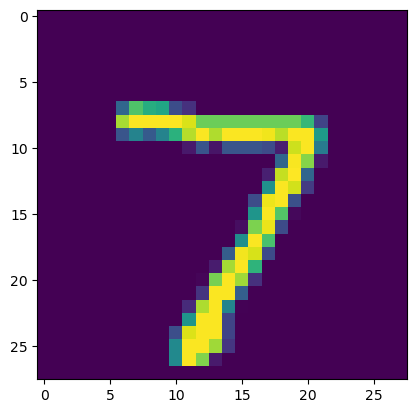

Attempted_reconstruction_of_the_Image


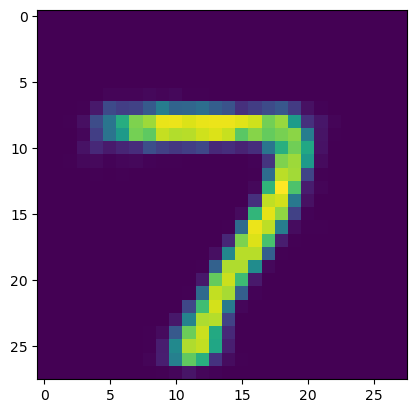

In [17]:
n=0
print("original_image")
plt.imshow(X_test[n])
plt.show()
print("Attempted_reconstruction_of_the_Image")
plt.imshow(passed_images[n])

**Noise Remover**

In this part we want to make a model with the autoencoders to remove noises!

In [18]:
from tensorflow.keras.layers import GaussianNoise

In [19]:
sample=GaussianNoise(0.2)
#the larger value the more noise added

In [21]:
noisey=sample(X_test[:10],training=True)
#training=True means adding noise

original


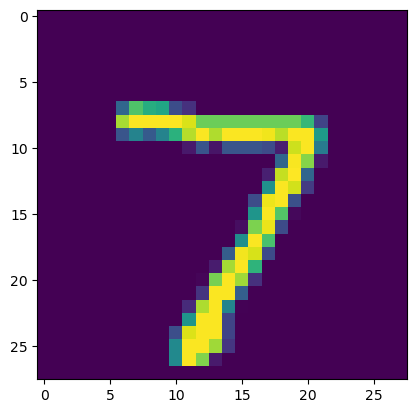

noisy_image


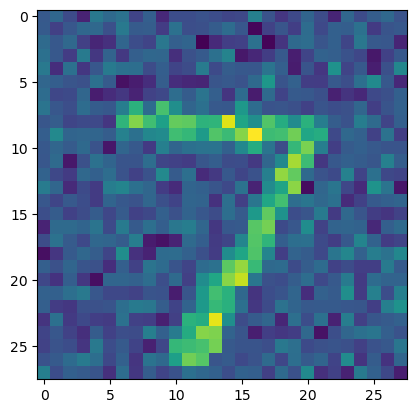

In [25]:
n=0
print("original")
plt.imshow(X_test[n])
plt.show()
print("noisy_image")
plt.imshow(noisey[n])

Let's use the same encoder and decoder we used before!

In [26]:
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400, activation='relu'))
#we would slowly decrease the dimention
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [27]:
decoder=Sequential()
#note: decoder neurons are the reverse of the enocder until you reach the first amount!
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [28]:
noise_remover=Sequential([encoder,decoder])

In [29]:
noise_remover.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

1. What is Loss?
Loss is a way to measure how well or how poorly your machine learning model is doing. It's like the score in a game where a lower score means better performance.

Example:
Imagine you are throwing darts at a dartboard. The bullseye is your target, and you want to hit it as closely as possible. The distance of your dart from the bullseye represents the loss. The closer your dart is to the bullseye (lower loss), the better you are at the game.

2. Why Did We Choose binary_crossentropy for the Loss?
Binary Crossentropy is a specific type of loss function used for binary classification problems, where there are only two possible outcomes (e.g., yes/no, cat/dog).

Example:
Let's say you are building a model to classify emails as either spam or not spam. Since there are only two categories (spam or not spam), you use binary_crossentropy to measure how well your model's predictions match the actual labels (spam or not spam). It helps the model learn by penalizing incorrect predictions more heavily.

3. What is an Optimizer?
An optimizer is an algorithm or method used to update the weights of your model in order to minimize the loss. It's like a coach giving you advice on how to adjust your throws to get closer to the bullseye.

Example:
Imagine you have a coach who watches you throw darts. After each throw, the coach tells you to move your hand slightly to the left or right to improve your aim. The optimizer does something similar by adjusting the model's weights to reduce the loss.

4. Why Did We Select adam for the Optimizer?
Adam is a popular and efficient optimizer that combines the best properties of other optimizers like AdaGrad and RMSProp. It adjusts the learning rate for each parameter individually.

Example:
Think of Adam as a really smart coach who not only tells you how to adjust your aim but also keeps track of your previous throws and learns the best way to improve your aim faster. This makes the learning process quicker and more effective.

5. What is a Metric?
A metric is a way to evaluate the performance of your model. Unlike the loss, which the model tries to minimize during training, metrics are used to give you additional information about the model's performance.

Example:
In the dart game, besides the distance from the bullseye (loss), you might also keep track of how many times you hit the target (accuracy). This gives you more information about your overall performance.

6. Why Did We Select accuracy for the Metric?
Accuracy measures the percentage of correct predictions made by the model out of all predictions. It is a straightforward and intuitive way to evaluate the performance of a classification model.

Example:
If you throw 10 darts and 8 of them hit the target, your accuracy is 80%. Similarly, if your model correctly classifies 80 out of 100 emails as spam or not spam, its accuracy is 80%. Accuracy is a useful metric when the classes are balanced (roughly equal number of examples in each class).

In [30]:
noise_remover.fit(X_train, X_train, epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.1414 - loss: 0.2142
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.2333 - loss: 0.1279
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.2526 - loss: 0.1161
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.2661 - loss: 0.1088
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.2724 - loss: 0.1051
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.2767 - loss: 0.1021
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.2805 - loss: 0.0996
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.2854 - loss: 0.0979


In [31]:
ten_noisy_images=sample(X_test[:10], training=True)

In [32]:
denoised=noise_remover(ten_noisy_images)

original figure


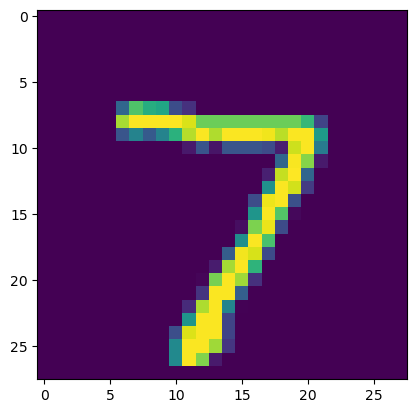

noisy figure


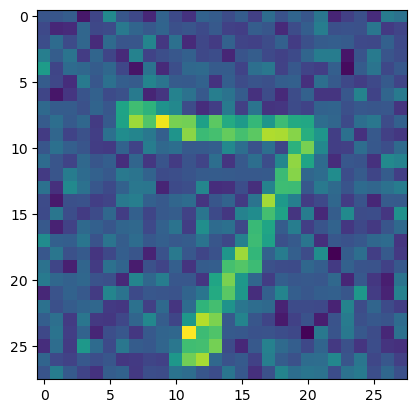

noise_removed_figure


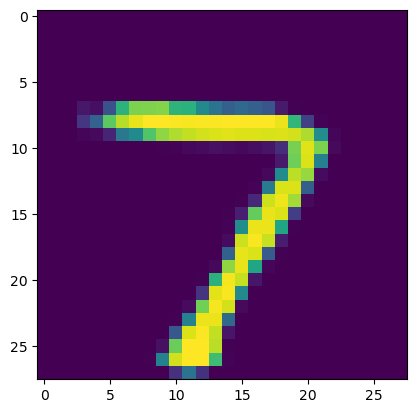

In [34]:
n=0
print("original figure")
plt.imshow(X_test[n])
plt.show()
print("noisy figure")
plt.imshow(ten_noisy_images[n])
plt.show()
print("noise_removed_figure")
plt.imshow(denoised[n])